In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [18]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [19]:
y.index = y.name

In [20]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [21]:
y.index = pd.to_datetime(y.index)

In [22]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [168]:
from pytrends.request import TrendReq

In [169]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["machine", "strong economy", "Apple", "NASDAQ", "mobile phones", "internet",
            "chairs", "snow", "water"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [170]:
X = df.resample("Q").mean()

In [171]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler = StandardScaler()

In [174]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [175]:
from sklearn.linear_model import Lasso

In [176]:
lasso = Lasso(alpha = .1)

In [177]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [178]:
coefficients = lasso.coef_

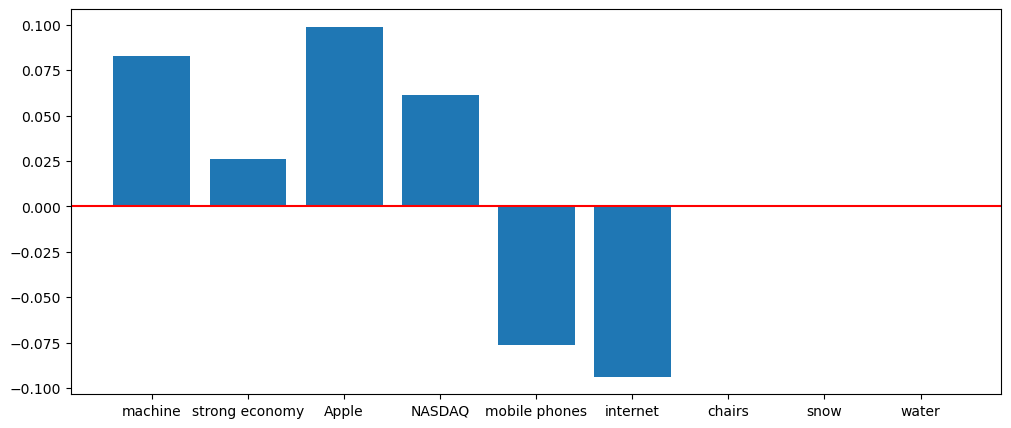

In [179]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Based from the above plot, the coefficients of the search terms that I think could nowcast Apple earnings was not equal to 0 whereas the other 3 search terms that I thought of randomly had coefficients reduced to 0. However, the only thing I do not understand is why the coefficient for 'mobile phones' and 'internet' were negative. I assume that when these search terms are trending then it would have a positive impact on the earnings of Apple.